<a href="https://colab.research.google.com/github/genc-ozge/genc-ozge.github.io/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Employee Attrition Analysis Using HR Analytics
I have analysed the IBM human resources dataset to gain a deeper understanding of employee attrition. My approach centered around employing a decision tree algorithm to predict attrition patterns.

In [1]:
#Import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv
User uploaded file "WA_Fn-UseC_-HR-Employee-Attrition.csv" with length 226506 bytes


In [4]:
import pandas as pd

# import data
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
# Some basic analysis on the data

data.head() #show the first rows of the data
data.describe() #describe the data
data.info() #check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#ordinal variable, Business Travel

print(data.BusinessTravel.unique())#check the uniqe values in the data

data.BusinessTravel = data.BusinessTravel.astype('category') #change the type to category

#reorder categories from No-travel to travel frequently

data.BusinessTravel = data.BusinessTravel.cat.reorder_categories(['Non-Travel',
                                                                  'Travel_Rarely',
                                                                  'Travel_Frequently'])

data.BusinessTravel = data.BusinessTravel.cat.codes #give the numbers 0,1,2(in order)

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [7]:
#Nominal Categorical Values: Attrition, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime


#Attrition Column
attritions = pd.get_dummies(data.Attrition)  #create a new object and get dummies from attrition column
attritions = attritions.drop("No", axis=1) #to avoid dummy trap, drop 'No' columni 'Yes' column is enough
data = data.drop("Attrition", axis=1) #drop 'Attrition' column
data = data.join(attritions) #join new attritions data with HR data

#Department Column
departments = pd.get_dummies(data.Department) #create a new object and get dummies from Department column
departments = departments.drop("Human Resources", axis=1) #to avoid dummy trap, drop 'Human Resources' column
data = data.drop("Department", axis=1) #drop 'Department' column
data = data.join(departments) #join departments data with HR data

#Education Column
educationfields = pd.get_dummies(data.EducationField) #create a new object and get dummies from EducationField column
educationfields = educationfields.drop("Other", axis=1) #to avoid dummy trap, drop 'Other' column
data = data.drop("EducationField", axis=1) #drop 'EducationField' column
data = data.join(educationfields) #join educationfields data with HR data
data.info()

#Gender Column
genders = pd.get_dummies(data.Gender) #create a new object and get dummies from Gender column
genders = genders.drop("Male", axis=1) #to avoid dummy trap, drop 'Male' column
data = data.drop("Gender", axis=1) #drop 'Gender' column
data = data.join(genders) #join genders data with HR data

#Job Role Column
jobroles = pd.get_dummies(data.JobRole) #create a new object and get dummies from JobRole column
jobroles = jobroles.drop("Human Resources", axis=1) #to avoid dummy trap, drop 'Human Resources' column
data = data.drop("JobRole", axis=1) #drop 'JobRole' column
data = data.join(jobroles) #join jobroles data with HR data

#Marital Status
maritalstatuses = pd.get_dummies(data.MaritalStatus) #create a new object and get dummies from MaritalStatus column
maritalstatuses = maritalstatuses.drop("Divorced", axis=1) #to avoid dummy trap, drop 'Divorced' column
data = data.drop("MaritalStatus", axis=1)#drop 'MaritalStatus' column
data = data.join(maritalstatuses) #join maritalstatuses data with HR data

#Over Eighteen
data = data.drop("Over18", axis=1) #drop Over18 data because all the values are 'y'

#Overtime
overtimes =pd.get_dummies(data.OverTime) #create a new object and get dummies from OverTime column
overtimes = overtimes.drop("Yes", axis=1) #to avoid dummy trap, drop 'Yes' column
data = data.drop("OverTime", axis=1) #drop 'OverTime' column
data = data.join(overtimes) #join overtimes data with HR data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   int8  
 2   DailyRate                 1470 non-null   int64 
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EmployeeCount             1470 non-null   int64 
 6   EmployeeNumber            1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

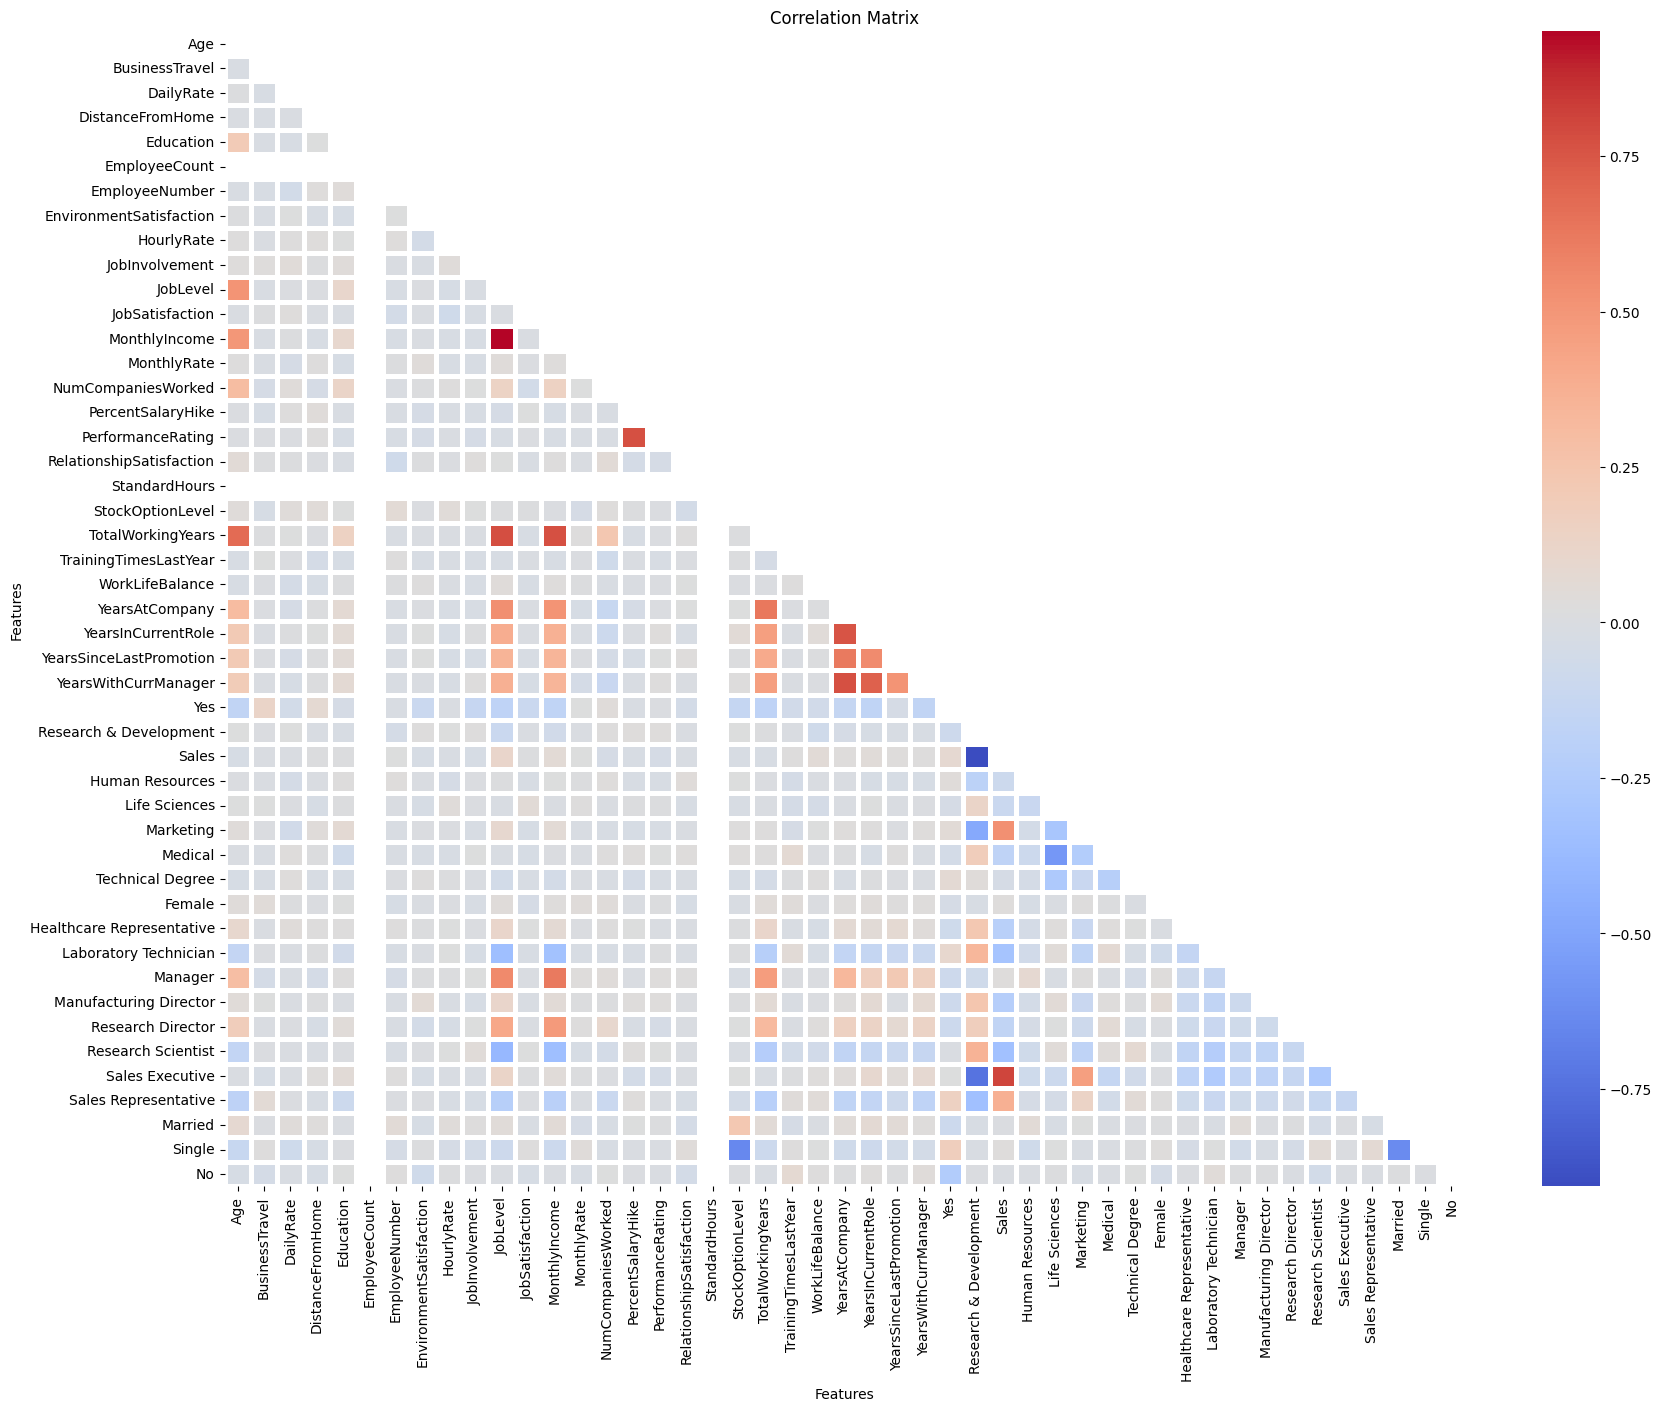

In [8]:
# Correlation Matrix
plt.figure(figsize=(20, 15))
cor = data.corr()  # use corr() function and create corr object

# Create heatmap diagram with improvements
sns.heatmap(cor, cmap='coolwarm', fmt='.2f', linewidths=2.5, mask=np.triu(cor))

# Set title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Adjust font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90)

plt.show()  # show diagram